AIM:
TO APPLY BIG DATA ANALYTICS TO BITCOIN DATASET AND APPLY MODEL FOR PREDICTION.
IT HAS COLUMNS SUCH AS:
1. t: Unix timestamp
2. o: Opening price on the given day
3. h: Highest price on the given day
4. l: Lowest price on the given day
5. c: Closing price on the given day
6. v: Volume of transactions on the given day

 TRANSFORMATIONS AND ACTIONS WILL BE APPLIED USING PYSPARK AND KEY INSIGHTS WILL BE GIVEN.

# **SETTING UP THE ENVIRONMENT AND IMPORTING LIBRARIES**

In [ ]:
!pip install pyspark


In [ ]:
!pip install findspark


In [ ]:
from pyspark.sql.functions import col, sum
import findspark
from pyspark.sql.functions import from_unixtime, col
from pyspark.sql import SparkSession
from pyspark.sql.types import TimestampType
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
findspark.init()
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better---no need to use df.show()
spark

# **BASIC INFORMATOIN**

In [ ]:
data =spark.read.csv("/content/btc_15m_data_2018_to_2025.csv",header=True,inferSchema=True)
data.printSchema()

root
 |-- Open time: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- Close time: timestamp (nullable = true)
 |-- Quote asset volume: double (nullable = true)
 |-- Number of trades: integer (nullable = true)
 |-- Taker buy base asset volume: double (nullable = true)
 |-- Taker buy quote asset volume: double (nullable = true)
 |-- Ignore: integer (nullable = true)



In [ ]:
#counting rows
data.count()

252429

In [ ]:
data.columns

['Open time',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Close time',
 'Quote asset volume',
 'Number of trades',
 'Taker buy base asset volume',
 'Taker buy quote asset volume',
 'Ignore']

In [ ]:
#displaying top 10 records
data.show(10,False)

+-------------------+--------+--------+--------+--------+----------+-----------------------+------------------+----------------+---------------------------+----------------------------+------+
|Open time          |Open    |High    |Low     |Close   |Volume    |Close time             |Quote asset volume|Number of trades|Taker buy base asset volume|Taker buy quote asset volume|Ignore|
+-------------------+--------+--------+--------+--------+----------+-----------------------+------------------+----------------+---------------------------+----------------------------+------+
|2018-01-01 00:00:00|13715.65|13715.65|13400.01|13556.15|123.616013|2018-01-01 00:14:59.999|1675544.88664526  |1572            |63.227133                  |857610.82699857             |0     |
|2018-01-01 00:15:00|13533.75|13550.87|13402.0 |13521.12|98.13643  |2018-01-01 00:29:59.999|1321756.85180771  |1461            |47.686389                  |642281.17230261             |0     |
|2018-01-01 00:30:00|13500.0 |13545

In [ ]:
#counting null values in each column
null_counts = data.select([sum(col(c).isNull().cast("int")).alias(c) for c in data.columns])
null_counts.show()


+---------+----+----+---+-----+------+----------+------------------+----------------+---------------------------+----------------------------+------+
|Open time|Open|High|Low|Close|Volume|Close time|Quote asset volume|Number of trades|Taker buy base asset volume|Taker buy quote asset volume|Ignore|
+---------+----+----+---+-----+------+----------+------------------+----------------+---------------------------+----------------------------+------+
|        0|   0|   0|  0|    0|     0|         0|                 0|               0|                          0|                           0|     0|
+---------+----+----+---+-----+------+----------+------------------+----------------+---------------------------+----------------------------+------+



# **KEY INSIGHTS**

In [ ]:
ds=data.toPandas()
ds.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2018-01-01 00:00:00,13715.65,13715.65,13400.01,13556.15,123.616013,2018-01-01 00:14:59.999,1.675545e+06,1572,63.227133,8.576108e+05,0
1,2018-01-01 00:15:00,13533.75,13550.87,13402.00,13521.12,98.136430,2018-01-01 00:29:59.999,1.321757e+06,1461,47.686389,6.422812e+05,0
2,2018-01-01 00:30:00,13500.00,13545.37,13450.00,13470.41,79.904037,2018-01-01 00:44:59.999,1.078825e+06,1000,43.710406,5.900347e+05,0
3,2018-01-01 00:45:00,13494.65,13690.87,13450.00,13529.01,141.699719,2018-01-01 00:59:59.999,1.917783e+06,1195,73.897993,1.000614e+06,0
4,2018-01-01 01:00:00,13528.99,13571.74,13402.28,13445.63,72.537533,2018-01-01 01:14:59.999,9.778198e+05,898,34.257652,4.618369e+05,0


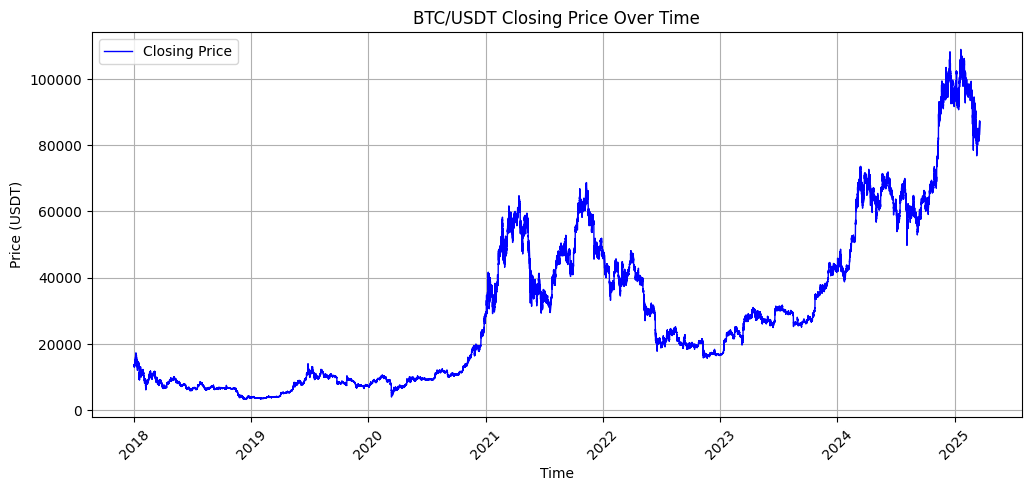

In [ ]:
# Plot Closing Price Over Time
plt.figure(figsize=(12, 5))
plt.plot(ds["Open time"], ds["Close"], label="Closing Price", color="blue", linewidth=1)
plt.xlabel("Time")
plt.ylabel("Price (USDT)")
plt.title("BTC/USDT Closing Price Over Time")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

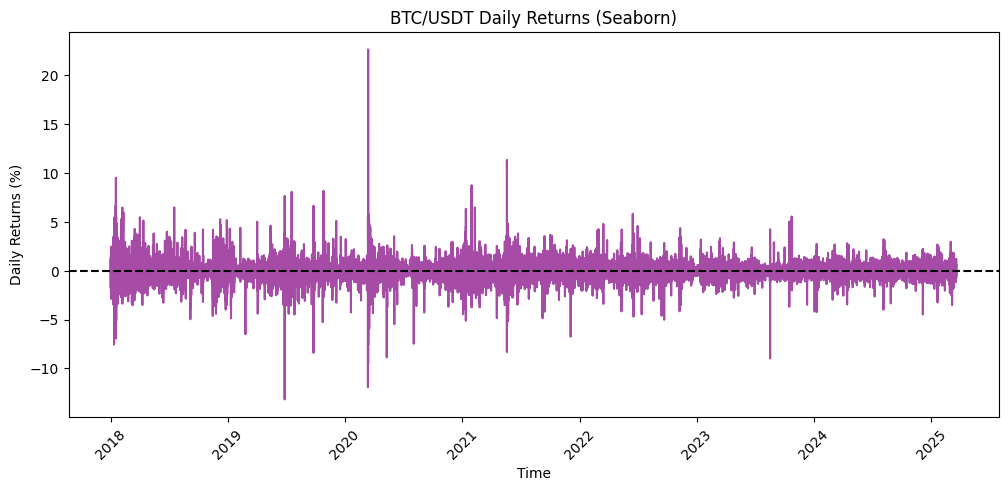

In [ ]:
# Compute daily returns
ds["returns"] = ds["Close"].pct_change() * 100  # Percentage change

# Plot using Seaborn
plt.figure(figsize=(12, 5))
sns.lineplot(data=ds, x="Open time", y="returns", color="purple", alpha=0.7)
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Daily Returns (%)")
plt.title("BTC/USDT Daily Returns (Seaborn)")
plt.xticks(rotation=45)
plt.show()

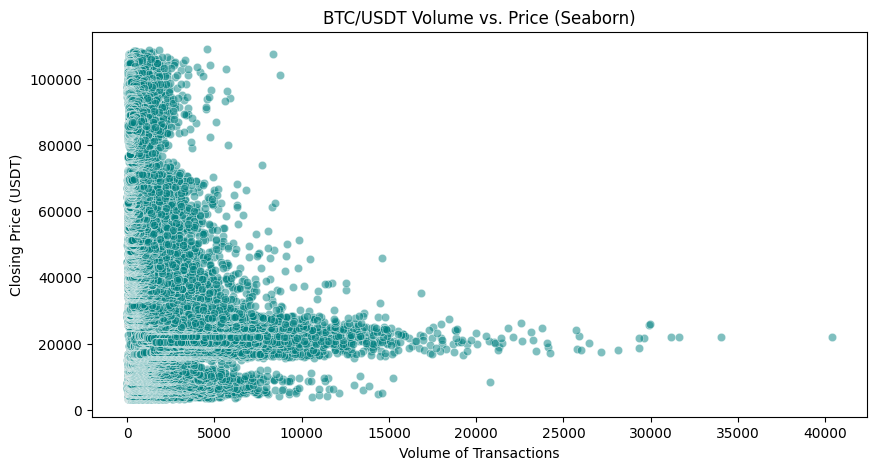

In [ ]:

# Scatter plot using Seaborn
plt.figure(figsize=(10, 5))
sns.scatterplot(data=ds, x="Volume", y="Close", alpha=0.5, color="teal")
plt.xlabel("Volume of Transactions")
plt.ylabel("Closing Price (USDT)")
plt.title("BTC/USDT Volume vs. Price (Seaborn)")
plt.show()

# **TRANSFORMATIONS AND ACTIONS**

TRANSFORMATIONS USED - FILTER,  MAP,  FLATMAP,  SORTBY, DISTINCT, GROUPBYKEY, MAPVALUES, AGGREGATEBYKEY, REDUCEBYKEY, MAPPARTITIONS, ISEMPTY.

ACTIONS USED - TAKE, FIRST, COUNT, MAX, MIN, FOLD, STDEV, VARIANCE, MEAN, TREEREDUCE.

In [ ]:
rdd = data.rdd
print(type(rdd))

<class 'pyspark.rdd.RDD'>


In [ ]:
#isEmpty() → Check If RDD is Empty
print(rdd.isEmpty())

False


In [ ]:
rdd.count()

252429

In [ ]:
# Remove header
header = rdd.first()
rdd = rdd.filter(lambda line: line != header)
print(rdd.take(2))

[Row(Open time=datetime.datetime(2018, 1, 1, 0, 15), Open=13533.75, High=13550.87, Low=13402.0, Close=13521.12, Volume=98.13643, Close time=datetime.datetime(2018, 1, 1, 0, 29, 59, 999000), Quote asset volume=1321756.85180771, Number of trades=1461, Taker buy base asset volume=47.686389, Taker buy quote asset volume=642281.17230261, Ignore=0), Row(Open time=datetime.datetime(2018, 1, 1, 0, 30), Open=13500.0, High=13545.37, Low=13450.0, Close=13470.41, Volume=79.904037, Close time=datetime.datetime(2018, 1, 1, 0, 44, 59, 999000), Quote asset volume=1078825.28721296, Number of trades=1000, Taker buy base asset volume=43.710406, Taker buy quote asset volume=590034.71316, Ignore=0)]


In [ ]:
# Convert data types (timestamp -> int, prices & volume -> float)
# Assuming row[0] is a datetime object, convert it to a UNIX timestamp using .timestamp()
rdd_cleaned = rdd.map(lambda row: (int(row[0].timestamp()), float(row[1]), float(row[2]), float(row[3]), float(row[4]), float(row[5])))
print(rdd_cleaned.take(2))

[(1514765700, 13533.75, 13550.87, 13402.0, 13521.12, 98.13643), (1514766600, 13500.0, 13545.37, 13450.0, 13470.41, 79.904037)]


In [ ]:
# convert date and time from ms to seconds
rdd_fm = rdd_cleaned.flatMap(lambda row: [(datetime.datetime.utcfromtimestamp(int(row[0]) / 1000), *row[1:])] if row[0] else [])
print(rdd_fm.take(2))

[(datetime.datetime(1970, 1, 18, 12, 46, 5, 700000), 13533.75, 13550.87, 13402.0, 13521.12, 98.13643), (datetime.datetime(1970, 1, 18, 12, 46, 6, 600000), 13500.0, 13545.37, 13450.0, 13470.41, 79.904037)]


In [ ]:
# Sort by volume - date with highest volume of transactions
df_sorted = rdd_fm.sortBy(lambda row: row[5], ascending=False)  # Access by index
print(df_sorted.take(5))

[(datetime.datetime(1970, 1, 20, 4, 21, 32, 400000), 21769.09, 22000.0, 21701.24, 21939.33, 40371.40506), (datetime.datetime(1970, 1, 20, 4, 21, 33, 300000), 21939.32, 22041.65, 21826.04, 21932.7, 34007.31063), (datetime.datetime(1970, 1, 20, 4, 21, 34, 200000), 21931.96, 22130.0, 21874.67, 21993.58, 31649.52486), (datetime.datetime(1970, 1, 20, 4, 21, 35, 100000), 21993.58, 22028.42, 21853.68, 21962.52, 31178.94805), (datetime.datetime(1970, 1, 20, 10, 19, 57, 900000), 25458.37, 26025.0, 25315.36, 25832.57, 29961.47469)]


In [ ]:
#displaying distinct records on closing price
rdd_dis=rdd_fm.map(lambda row: row[4]).distinct()
print(rdd_dis.take(3))

[13470.41, 13560.0, 13440.01]


In [ ]:
#grouping opening price and closing price
rdd_grouped = rdd.map(lambda row: (row[1], row[-2])).groupByKey().mapValues(list)
print(rdd_grouped.take(10))


[(13500.0, [590034.71316, 4357449.0945501, 3704077.44920769]), (13494.65, [1000614.39330831]), (13528.99, [461836.85398207]), (13440.01, [835492.45923455]), (13338.97, [736046.43460708]), (13330.26, [474701.23307922]), (13440.0, [585957.27143804, 2353036.09888818, 620711.607405]), (13562.37, [443361.22260799]), (13510.0, [354021.53033218]), (13434.98, [456758.78381016])]


In [ ]:
#getting high price for each timestamp
rdd_max_high = rdd_fm.map(lambda row: (row[0], float(row[2]))).aggregateByKey(
    float('-inf'),  # Initial value
    lambda x, y: max(x, y),  # Within each partition
    lambda x, y: max(x, y)   # Across partitions
)

print(rdd_max_high.take(5))


[(datetime.datetime(1970, 1, 18, 12, 46, 7, 500000), 13690.87), (datetime.datetime(1970, 1, 18, 12, 46, 9, 300000), 13595.89), (datetime.datetime(1970, 1, 18, 12, 46, 11, 100000), 13440.01), (datetime.datetime(1970, 1, 18, 12, 46, 12, 900000), 13388.0), (datetime.datetime(1970, 1, 18, 12, 46, 13, 800000), 13349.99)]


In [ ]:
#counting how many times lowest price appears
rdd_timestamp_count = rdd_fm.map(lambda row: (row[3], 1)).reduceByKey(lambda a, b: a + b)
print(rdd_timestamp_count.take(5))

[(13402.0, 1), (13450.0, 4), (13402.28, 1), (13430.0, 2), (13202.03, 1)]


In [ ]:
#price range
rdd_price_range = rdd.map(lambda row: (round(float(row[4]) / 1000) * 1000, 1)) \
.reduceByKey(lambda a, b: a + b) \
.max(key=lambda x: x[1])  # Get most frequent price range

print(f"Most common price range in 2020: {rdd_price_range}")

Most common price range in 2020: (7000, 16448)


In [ ]:
#fold to see total volume of transactions
#fold() – Aggregate the elements of each partition, and then the results for all the partitions.
from operator import add
volume_rdd = rdd.map(lambda row: row[5])
total_volume = volume_rdd.fold(0, add)
print("Total Volume of Transactions:", total_volume)

Total Volume of Transactions: 185195595.05356812


In [ ]:
from pyspark.statcounter import StatCounter
stats = rdd.map(lambda row: int(row[1])).stats()
print("Average of opening price: ",stats.mean())  # Average opening price
print("Variance of opening price: ",stats.variance())  # Variance of opening pricex
print("Standard Deviation of opening price: ",stats.stdev()) # stdev of opening price

Average of opening price:  30053.035713153764
Variance of opening price:  604697394.9954736
Standard Deviation of opening price:  24590.595661664513


In [ ]:
# Target closing price to find the closest match
target_price = 50000

# Using treeReduce to find the closest closing price and the corresponding record
closest_record = rdd.map(lambda row: (float(row[4]), row)).treeReduce(lambda x, y: x if abs(x[0] - target_price) < abs(y[0] - target_price) else y)

# Extracting the closest record
closest_closing_price, closest_record_data = closest_record
print(f"Record with the Closest Closing Price to {target_price}:")
print(closest_record_data)


Record with the Closest Closing Price to 50000:
Row(Open time=datetime.datetime(2024, 2, 13, 6, 45), Open=49987.27, High=50053.66, Low=49962.14, Close=50000.0, Volume=225.80035, Close time=datetime.datetime(2024, 2, 13, 6, 59, 59, 999000), Quote asset volume=11290445.8219571, Number of trades=8017, Taker buy base asset volume=107.8871, Taker buy quote asset volume=5394954.7744294, Ignore=0)


In [ ]:
# Get user input for date and time (without seconds)
user_input = input("Enter date and time (YYYY-MM-DD HH:MM ): ")
try:
    dt = datetime.datetime.strptime(user_input, "%Y-%m-%d %H:%M")
    timestamp = int(dt.timestamp())  # Convert to UNIX timestamp
    print(predict_prices(timestamp))
except ValueError:
    print("Invalid date format. Please enter in YYYY-MM-DD HH:MM format.")

Enter date and time (YYYY-MM-DD HH:MM ): 2020-12-31 16:01
{'open_price': 29120.28125, 'high_price': 29135.97265625, 'low_price': 29103.984375, 'close_price': 29121.73046875}


#**MODEL BUILDING AND TESTING**

#additional


gradient boosting-93

random- 92

xgboost-98

In [ ]:
import datetime
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lag, avg, stddev
from pyspark.sql.window import Window
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.ml.regression import LinearRegression

# Initialize Spark Session
spark = SparkSession.builder.appName("BitcoinPricePrediction").getOrCreate()

# Load dataset
df = spark.read.csv("/content/btc_15m_data_2018_to_2025.csv", header=True, inferSchema=True)

# Rename and select necessary columns
df = df.select(
    col("Open time").alias("open_time"),
    col("Open").alias("open"),
    col("High").alias("high"),
    col("Low").alias("low"),
    col("Close").alias("close"),
    col("Volume").alias("volume"),
    col("Quote asset volume").alias("quote_asset_volume"),
    col("Number of trades").alias("number_of_trades"),
    col("Taker buy base asset volume").alias("taker_buy_base_asset_volume"),
    col("Taker buy quote asset volume").alias("taker_buy_quote_asset_volume")
)

In [ ]:

# Convert timestamp
df = df.withColumn("open_time", col("open_time").cast("timestamp"))
windowSpec = Window.orderBy("open_time") #tocalculate moving avg

In [ ]:
# highlight long-term trends
'''If moving_avg_5 crosses above moving_avg_15, it may indicate a bullish (upward) trend.
If moving_avg_5 crosses below moving_avg_15, it may indicate a bearish (downward) trend.'''

df = df.withColumn("prev_close", lag("close").over(windowSpec))
df = df.withColumn("prev_high", lag("high").over(windowSpec))
df = df.withColumn("prev_low", lag("low").over(windowSpec))

#  moving averages
df = df.withColumn("moving_avg_5", avg("close").over(Window.orderBy("open_time").rowsBetween(-4, 0)))
df = df.withColumn("moving_avg_15", avg("close").over(Window.orderBy("open_time").rowsBetween(-14, 0)))

# volatility measure
df = df.withColumn("price_volatility", stddev("close").over(Window.orderBy("open_time").rowsBetween(-4, 0)))
df = df.dropna()

In [ ]:
# Assemble features
feature_cols = [
    "prev_close", "prev_high", "prev_low",
    "moving_avg_5", "moving_avg_15", "price_volatility",
    "volume", "quote_asset_volume", "number_of_trades",
    "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume"
]

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df = assembler.transform(df)

# Scale features using MinMaxScaler
scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")
scaler_model = scaler.fit(df)
df = scaler_model.transform(df)

# Train-Test Split
split_unix = df.select(col("open_time").cast("long")).approxQuantile("open_time", [0.8], 0.01)[0]
train_df = df.filter(col("open_time").cast("long") < split_unix)
test_df = df.filter(col("open_time").cast("long") >= split_unix)

# Train Lasso Regression model
lasso_models = {}
labels = ["open", "high", "low", "close"]

for label in labels:
    lasso = LinearRegression(featuresCol="scaledFeatures", labelCol=label, maxIter=100, regParam=0.1, elasticNetParam=1.0)
    lasso_models[label] = lasso.fit(train_df)

# Get the latest available data for prediction
latest_row = df.orderBy(col("open_time").desc()).limit(1).collect()[0]
current_date = datetime.datetime.now().date()
tomorrow = current_date + datetime.timedelta(days=1)

# Prepare feature vector from last known data
features_values = tuple(latest_row[feature] for feature in feature_cols)
new_data = spark.createDataFrame([features_values], feature_cols)
new_data = assembler.transform(new_data)
new_data = scaler_model.transform(new_data)

# Predict tomorrow's price
predictions = {}
for label, model in lasso_models.items():
    pred = model.transform(new_data).select("prediction").collect()[0][0]
    predictions[label] = pred


print(f"Open: {predictions['open']:.2f}")
print(f"High: {predictions['high']:.2f}")
print(f"Low: {predictions['low']:.2f}")
print(f"Close: {predictions['close']:.2f}")

Open: 86674.87
High: 86949.41
Low: 86504.70
Close: 86856.83


In [ ]:
!pip install -q streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lag, avg, stddev
from pyspark.sql.window import Window
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.ml.regression import LinearRegression

# Custom CSS for styling buttons and text
st.markdown(
    """
    <style>
        /* Style the buttons */
        div.stButton > button:first-child {
            background-color: red;
            color: white;
            border-radius: 8px;
            padding: 10px;
            font-size: 16px;
            border: none;
            width: 100%;
        }
        div.stButton > button:hover {
            background-color: darkred;
            color: white;
        }

        /* Style the main title */
        .main-title {
            font-size: 36px;
            font-weight: bold;
            text-align: center;
            color: #ff4b4b;
        }

        /* Style for predicted price text */
        .predicted-text {
            font-size: 22px;
            font-weight: bold;
            color: #28a745;
        }

        /* Add shadow effect to predictions */
        .shadow-box {
            background-color: #fff3cd;
            padding: 15px;
            border-radius: 10px;
            box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.2);
        }

    </style>
    """,
    unsafe_allow_html=True
)

# Initialize Spark Session
spark = SparkSession.builder.appName("BitcoinPricePrediction").getOrCreate()

# Load dataset
df = spark.read.csv("/content/btc_15m_data_2018_to_2025.csv", header=True, inferSchema=True)

# Rename and select necessary columns
df = df.select(
    col("Open time").alias("open_time"),
    col("Open").alias("open"),
    col("High").alias("high"),
    col("Low").alias("low"),
    col("Close").alias("close"),
    col("Volume").alias("volume"),
    col("Quote asset volume").alias("quote_asset_volume"),
    col("Number of trades").alias("number_of_trades"),
    col("Taker buy base asset volume").alias("taker_buy_base_asset_volume"),
    col("Taker buy quote asset volume").alias("taker_buy_quote_asset_volume")
)

# Convert timestamp
df = df.withColumn("open_time", col("open_time").cast("timestamp"))
windowSpec = Window.orderBy("open_time")

# Add previous price features
df = df.withColumn("prev_close", lag("close").over(windowSpec))
df = df.withColumn("prev_high", lag("high").over(windowSpec))
df = df.withColumn("prev_low", lag("low").over(windowSpec))

# Add moving averages
df = df.withColumn("moving_avg_5", avg("close").over(Window.orderBy("open_time").rowsBetween(-4, 0)))
df = df.withColumn("moving_avg_15", avg("close").over(Window.orderBy("open_time").rowsBetween(-14, 0)))

# Add volatility measure
df = df.withColumn("price_volatility", stddev("close").over(Window.orderBy("open_time").rowsBetween(-4, 0)))
df = df.dropna()

# Assemble features
feature_cols = [
    "prev_close", "prev_high", "prev_low",
    "moving_avg_5", "moving_avg_15", "price_volatility",
    "volume", "quote_asset_volume", "number_of_trades",
    "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume"
]

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df = assembler.transform(df)

# Scale features using MinMaxScaler
scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")
scaler_model = scaler.fit(df)
df = scaler_model.transform(df)

# Train-Test Split
split_unix = df.select(col("open_time").cast("long")).approxQuantile("open_time", [0.8], 0.01)[0]
train_df = df.filter(col("open_time").cast("long") < split_unix)
test_df = df.filter(col("open_time").cast("long") >= split_unix)

# Train Lasso Regression model
lasso_models = {}
labels = ["open", "high", "low", "close"]

for label in labels:
    lasso = LinearRegression(featuresCol="scaledFeatures", labelCol=label, maxIter=100, regParam=0.1, elasticNetParam=1.0)
    lasso_models[label] = lasso.fit(train_df)

# Get the latest available data for prediction
latest_row = df.orderBy(col("open_time").desc()).limit(1).collect()[0]
current_date = datetime.datetime.now().date()
tomorrow = current_date + datetime.timedelta(days=1)

# Prepare feature vector from last known data
features_values = tuple(latest_row[feature] for feature in feature_cols)
new_data = spark.createDataFrame([features_values], feature_cols)
new_data = assembler.transform(new_data)
new_data = scaler_model.transform(new_data)

# Predict tomorrow's price
predictions = {}
for label, model in lasso_models.items():
    pred = model.transform(new_data).select("prediction").collect()[0][0]
    predictions[label] = pred

# Streamlit UI
st.markdown("<h1 class='main-title'>Bitcoin Price Prediction</h1>", unsafe_allow_html=True)

# Create two buttons
col1, col2 = st.columns(2)

with col1:
    predict_button = st.button("Predict Prices")

with col2:
    graph_button = st.button("Show Graph")

# Display predictions when "Predict Prices" button is clicked
if predict_button:
    st.markdown(f"""
        <div class="shadow-box">
        <h2>Predicted Bitcoin Prices for <span style="color: #ff4b4b;">{tomorrow}</span>:</h2>
        <p class="predicted-text"><b>Open Price:</b> ${predictions['open']:.2f}</p>
        <p class="predicted-text"><b>High Price:</b> ${predictions['high']:.2f}</p>
        <p class="predicted-text"><b>Low Price:</b> ${predictions['low']:.2f}</p>
        <p class="predicted-text"><b>Close Price:</b> ${predictions['close']:.2f}</p>
        </div>
    """, unsafe_allow_html=True)

# Display graph when "Show Graph" button is clicked
if graph_button:
    st.subheader("Bitcoin Price Trends")

    # Convert predictions to DataFrame for plotting
    pred_df = pd.DataFrame({
        "Price Type": ["Open", "High", "Low", "Close"],
        "Predicted Price": [predictions["open"], predictions["high"], predictions["low"], predictions["close"]]
    })

    # Plot the price predictions as a **line chart**
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.lineplot(data=pred_df, x="Price Type", y="Predicted Price", marker="o", linewidth=2.5, ax=ax, color="red")

    ax.set_title("Bitcoin Price Prediction for Tomorrow", fontsize=14)
    ax.set_xlabel("Price Type", fontsize=12)
    ax.set_ylabel("Price (USD)", fontsize=12)
    ax.grid(True)

    st.pyplot(fig)


Overwriting app.py


In [ ]:
!npm install localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇
up to date, audited 23 packages in 2s
⠇
⠇3 packages are looking for funding
⠇  run `npm fund` for details
⠇
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠇

In [ ]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com


34.29.134.140
⠙⠹your url is: https://real-masks-bet.loca.lt
